In [125]:
import geopandas as gp
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [298]:
ecoregions = gp.GeoDataFrame.from_file("../terr-ecoregions-TNC/tnc_terr_ecoregions.shp")


In [6]:
ecoregions.columns

Index(['CLS_CODE', 'ECODE_NAME', 'ECO_CODE', 'ECO_ID_U', 'ECO_NAME',
       'ECO_NOTES', 'ECO_NUM', 'ER_DATE_U', 'ER_RATION', 'ER_UPDATE',
       'RealmMHT', 'SOURCEDATA', 'WWF_MHTNAM', 'WWF_MHTNUM', 'WWF_REALM',
       'WWF_REALM2', 'geometry'],
      dtype='object')

In [38]:
deserts = ecoregions[(ecoregions['ECO_NAME']).str.contains("Desert")]

In [48]:
species = pd.read_csv("../all_species.csv", header=None)
speciesCenters = pd.read_csv("../centroids2.csv", header=0)

In [80]:
merged = species.merge(speciesCenters, how='inner', left_index=True, right_index=True, suffixes="AA")\
        .drop('Unnamed: 0', axis=1).drop(0, axis=1)

In [90]:
merged.columns = [
    "species",
    "score1",
    "score2",
    "score3",
    "score4",
    "lat",
    "lon"
]

In [146]:
points = [Point(lat, lon) for lat, lon in list(zip(merged["lon"], merged["lat"]))]

In [296]:
merged = gp.GeoDataFrame(merged, geometry=points)

(-155.8370840768784,
 164.86187394404439,
 -52.488915105963947,
 61.524295472664953)

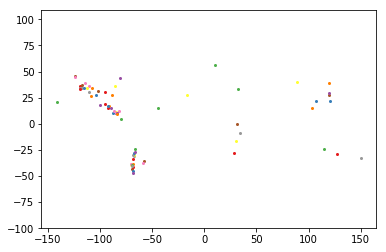

In [295]:
merged.geometry.plot()

plt.axis('equal')



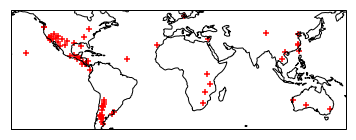

In [161]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
plt.scatter(merged["lon"], merged["lat"], transform=ccrs.PlateCarree(), color="red",marker='+')
ax.coastlines()

In [292]:
def whichEcoregion(ecoregions, point, typ):
    for _, region in ecoregions.iterrows():
        if(point.geometry.within(region["geometry"])):
            return region[typ]
        

In [293]:
merged.crs = {'init' : 'epsg:4326'}

In [303]:
merged['WWF_MHTNAM-ecoregion'] = [whichEcoregion(ecoregions, row, "WWF_MHTNAM") for idx, row in merged.iterrows()]
merged['ECO_NAME-ecoregion'] = [whichEcoregion(ecoregions, row, "ECO_NAME") for idx, row in merged.iterrows()]

In [301]:
merged.drop('ecoregions', axis=1, inplace=True)
merged.drop('ecoregion', axis=1, inplace=True)

In [304]:
merged

,species,score1,score2,score3,score4,lat,lon,geometry,WWF_MHTNAM-ecoregion,ECO_NAME-ecoregion
0,Anolis carolinensis,0.697433,0.681756,0.627670,0.689986,30.610053,-95.368265,POINT (-95.36826538673469 30.6100525418367),Temperate Conifer Forests,Upper West Gulf Coastal Plain
1,Anolis cupreus,0.825352,0.825704,0.808451,0.739789,10.438718,-84.821745,POINT (-84.8217449702201 10.4387178261012),Tropical and Subtropical Moist Broadleaf Forests,Isthmian-Atlantic Moist Forests
2,Anolis humilis,0.858262,0.844017,0.749525,0.793210,10.363891,-84.176701,POINT (-84.1767005813859 10.3638909599721),Tropical and Subtropical Moist Broadleaf Forests,Isthmian-Atlantic Moist Forests
3,Anolis intermedius,0.679293,0.669192,0.684343,0.742424,9.968683,-84.134812,POINT (-84.1348119826708 9.968682762948911),Tropical and Subtropical Moist Broadleaf Forests,Costa Rican Seasonal Moist Forests
4,Anolis lemurinus,0.722631,0.748650,0.737604,0.639543,16.587910,-90.992841,POINT (-90.9928411643135 16.5879103385629),Tropical and Subtropical Moist Broadleaf Forests,Petén-Veracruz Moist Forests
5,Anolis limifrons,0.846879,0.858089,0.833121,0.793885,11.312314,-84.127161,POINT (-84.127161289388 11.3123137888343),Tropical and Subtropical Moist Broadleaf Forests,Isthmian-Atlantic Moist Forests
6,Anolis lionotus,0.725309,0.712963,0.706790,0.694444,10.190785,-83.723422,POINT (-83.7234220696816 10.1907847424075),Tropical and Subtropical Moist Broadleaf Forests,Isthmian-Atlantic Moist Forests
7,Anolis tropidolepis,0.957756,0.946676,0.929363,0.917590,10.009372,-84.049108,POINT (-84.04910831303091 10.0093717958735),Tropical and Subtropical Moist Broadleaf Forests,Costa Rican Seasonal Moist Forests
8,Bufo alvarius,0.746170,0.699183,0.740552,0.617978,30.681703,-110.265889,POINT (-110.265888723641 30.6817034921089),Deserts and Xeric Shrublands,Apache Highlands
9,Bufo canaliferus,0.878271,0.910468,0.845730,0.757059,15.301282,-92.551711,POINT (-92.55171090986789 15.3012823411031),Tropical and Subtropical Moist Broadleaf Forests,Sierra Madre De Chiapas Moist Forests


In [307]:
dry = merged[(merged["WWF_MHTNAM-ecoregion"] == "Deserts and Xeric Shrublands") \
       | (merged["WWF_MHTNAM-ecoregion"] == "Temperate Grasslands, Savannas and Shrublands")]

In [308]:
len(dry)/len(merged)

0.29333333333333333

In [309]:
dry

,species,score1,score2,score3,score4,lat,lon,geometry,WWF_MHTNAM-ecoregion,ECO_NAME-ecoregion
8,Bufo alvarius,0.746170,0.699183,0.740552,0.617978,30.681703,-110.265889,POINT (-110.265888723641 30.6817034921089),Deserts and Xeric Shrublands,Apache Highlands
10,Bufo debilis,0.895395,0.902402,0.896563,0.884551,27.907027,-103.771689,POINT (-103.77168907196 27.9070271587593),Deserts and Xeric Shrublands,Chihuahuan Desert
18,Ctenotus uber,0.547017,0.586114,0.543984,0.558477,-29.219582,127.153479,POINT (127.15347928125 -29.2195818236566),Deserts and Xeric Shrublands,Nullarbor Plains Xeric Shrublands
23,Eremias multiocellata,0.623782,0.569201,0.576023,0.756335,40.102019,89.028584,POINT (89.02858417653169 40.102018517558),Deserts and Xeric Shrublands,Taklimakan Desert
25,Formica perpilosa,0.681818,0.757025,0.752066,0.690083,36.487314,-110.231107,POINT (-110.231106692308 36.4873136199095),Deserts and Xeric Shrublands,Colorado Plateau
32,Liolaemus bibronii,0.690879,0.757427,0.691474,0.697118,-39.425585,-69.995640,POINT (-69.9956397184943 -39.4255848412439),"Temperate Grasslands, Savannas and Shrublands",Patagonian Steppe
33,Liolaemus boulengeri,0.627767,0.678739,0.606304,0.719651,-42.993359,-68.918031,POINT (-68.91803062671229 -42.9933589041096),"Temperate Grasslands, Savannas and Shrublands",Patagonian Steppe
34,Liolaemus cf elongatus,0.824437,0.838043,0.816065,0.837781,-38.722118,-70.461970,POINT (-70.4619704010067 -38.7221178221477),"Temperate Grasslands, Savannas and Shrublands",Patagonian Steppe
36,Liolaemus darwinii,0.856161,0.856161,0.789054,0.816007,-34.016645,-68.068975,POINT (-68.06897543984961 -34.0166449887218),"Temperate Grasslands, Savannas and Shrublands",Low Monte
37,Liolaemus fitzingerii,0.483333,0.533333,0.361111,0.486111,-45.687141,-68.606051,POINT (-68.6060513333333 -45.6871409285714),"Temperate Grasslands, Savannas and Shrublands",Patagonian Steppe


In [314]:
dry.to_csv("all_species_ecoregions.csv")